## A new library to download data directly from COPERNICUS marine data store in R
For this tutorial, we will use the [CopernicusMarine library](https://github.com/pepijn-devries/CopernicusMarine)

In [60]:
# load the library
library(CopernicusMarine)
library(loadeR)
library(raster)
# run this to register your credentials
options(CopernicusMarine_uid = "rsoldan") 
options(CopernicusMarine_pwd = "######")

Loading required package: sp



In [22]:
# which dataset is available?
CopernicusMarine::copernicus_products_list()


product_id,title,thumbnailUrl,sources,processingLevel,areas,geoResolution,vertLevels,tempExtentBegin,tempResolutions,mainVariables,_hasZarr,numLayers,omiFigureUrl,tempExtentEnd
<chr>,<chr>,<chr>,<list>,<chr>,<list>,<list>,<int>,<chr>,<list>,<list>,<lgl>,<int>,<chr>,<chr>
GLOBAL_ANALYSISFORECAST_PHY_001_024,Global Ocean 1/12° Physics Analysis and Forecast updated Daily,https://catalogue.marine.copernicus.eu/documents/IMG/GLOBAL-ANALYSIS-FORECAST-PHYS-001-024-c.gif,Numerical models,Level 4,Global Ocean,"0.083 , degree, 0.083 , degree",50,2020-11-29,"Hourly , Daily , Monthly","Mixed layer thickness, Salinity , Sea ice , Sea surface height , Temperature , Velocity , Wave",TRUE,63,NA,NA
GLOBAL_OMI_OHC_area_averaged_anomalies_0_2000,Global Ocean Heat Content (0-2000m) time series and trend from Reanalysis & Multi-Observations Reprocessing,https://catalogue.marine.copernicus.eu/documents/IMG/GLOBAL_OMI_OHC_area_averaged_anomalies_0_2000.png,"In-situ observations , Numerical models , Satellite observations",NA,Global Ocean,NA,NA,NA,Yearly,Temperature,TRUE,1,https://catalogue.marine.copernicus.eu/documents/IMG/GLOBAL_OMI_OHC_area_averaged_anomalies-hq.png,NA
GLOBAL_OMI_OHC_area_averaged_anomalies_0_300,Global Ocean Heat Content (0-300m) from Reanalysis & Multi-Observations Reprocessing,https://catalogue.marine.copernicus.eu/documents/IMG/GLOBAL_OMI_OHC_area_averaged_anomalies_0_300.png,"In-situ observations , Numerical models , Satellite observations",NA,Global Ocean,NA,NA,NA,Yearly,Temperature,NA,1,https://catalogue.marine.copernicus.eu/documents/IMG/GLOBAL_OMI_OHC_area_averaged_anomalies-hq.png,NA
GLOBAL_OMI_OHC_area_averaged_anomalies_0_700,Global Ocean Heat Content (0-700m) from Reanalysis & Multi-Observations Reprocessing,https://catalogue.marine.copernicus.eu/documents/IMG/GLOBAL_OMI_OHC_area_averaged_anomalies_0_700.png,"In-situ observations , Numerical models , Satellite observations",NA,Global Ocean,NA,NA,NA,Yearly,Temperature,NA,1,https://catalogue.marine.copernicus.eu/documents/IMG/GLOBAL_OMI_OHC_area_averaged_anomalies_0_700-hq.png,NA
GLOBAL_OMI_CLIMVAR_enso_Tzt_anomaly,Nino 3.4 Temporal Evolution of Vertical Profile of Temperature from Reanalysis,https://catalogue.marine.copernicus.eu/documents/IMG/GLOBAL_OMI_CLIMVAR_enso_Tzt_anomaly.png,Numerical models,NA,Global Ocean,NA,NA,NA,Monthly,Temperature,NA,1,https://catalogue.marine.copernicus.eu/documents/IMG/GLOBAL_OMI_CLIMVAR_enso_Tzt_anomaly-hq.png,NA
GLOBAL_OMI_WMHE_heattrp,Mean Heat Transport across sections from Reanalysis,https://catalogue.marine.copernicus.eu/documents/IMG/GLOBAL_OMI_WMHE_heattrp.png,Numerical models,NA,Global Ocean,NA,NA,NA,"Multi-yearly, Yearly",Velocity,NA,1,https://catalogue.marine.copernicus.eu/documents/IMG/GLOBAL_OMI_WMHE_heattrp-hq.png,NA
GLOBAL_OMI_WMHE_northward_mht,"Northward Heat Transport for Global Ocean, Atlantic and Indian+Pacific basins from Reanalysis",https://catalogue.marine.copernicus.eu/documents/IMG/GLOBAL_OMI_WMHE_northward_mht.png,Numerical models,NA,Global Ocean,NA,NA,NA,"Multi-yearly, Yearly",Velocity,NA,1,https://catalogue.marine.copernicus.eu/documents/IMG/GLOBAL_OMI_WMHE_northward_mht-hq.png,NA
GLOBAL_OMI_WMHE_voltrp,Mean Volume Transport across sections from Reanalysis,https://catalogue.marine.copernicus.eu/documents/IMG/GLOBAL_OMI_WMHE_voltrp.png,Numerical models,NA,Global Ocean,NA,NA,NA,"Multi-yearly, Yearly",Velocity,NA,1,https://catalogue.marine.copernicus.eu/documents/IMG/GLOBAL_OMI_WMHE_voltrp-hq.png,NA
GLOBAL_ANALYSISFORECAST_WAV_001_027,Global Ocean Waves Analysis and Forecast,https://catalogue.marine.copernicus.eu/documents/IMG/GLOBAL_ANALYSIS_FORECAST_WAV_001_027.png,Numerical models,Level 4,Global Ocean,"0.083 , degree, 0.083 , degree",NA,2020-11-29,Hourly,"Velocity, Wave",NA,18,NA,NA


### Interesting datasets are:
- [GLOBAL_REANALYSIS_PHY_001_031](https://data.marine.copernicus.eu/product/GLOBAL_REANALYSIS_PHY_001_031/services). For sea surface temperature, mixed layers, etc. (Different reanalysis sisyems available and possibility to choose)
- [GLOBAL_ANALYSIS_FORECAST_BIO_001_028](https://data.marine.copernicus.eu/product/GLOBAL_ANALYSIS_FORECAST_BIO_001_028/services). For minerals concentration
- [GLOBAL_MULTIYEAR_BGC_001_029](https://data.marine.copernicus.eu/product/GLOBAL_MULTIYEAR_BGC_001_029/description). For phytoplankton and primary productivity
- [GLOBAL_MULTIYEAR_BGC_001_033](https://data.marine.copernicus.eu/product/GLOBAL_MULTIYEAR_BGC_001_033/description). For phytoplankton but with more info

To access detailed information on a product run CopernicusMarine::copernicus_product_details("GLOBAL_REANALYSIS_PHY_001_031")

In [92]:
# Let's look at sea surface temperature
destination <- tempfile(tmpdir = "/home/jovyan/", fileext = ".nc")

copernicus_download_motu(
  destination   = destination,
  product       = "GLOBAL_REANALYSIS_PHY_001_031",
  layer         = "global-reanalysis-phy-001-031-grepv2-daily", # look online for this info, for now
  output        = "netcdf",
  region        = c(-60, -10, 15, 30), # part of the Cape Verde Archipelago
  timerange     = c("2000-01-01", "2000-01-02"), # two days of data
  verticalrange =c(0,1), # this is the number of vertical levels, depends on the product. Here we are using only one, the first
  sub_variables = "thetao_foam" # look online for this info, for now. Sea water temperature with reanalysis method FOAM
)


Already logged in

Preparing download...


Done



In [ ]:
# check what data you downloaded with dataInventory
#dataInventory("file_name")

In [93]:
# load the data
out <- loadGridData("/home//jovyan//file5ef92d8c47f8.nc", var = "thetao_foam")

[2023-03-19 18:19:31] Defining geo-location parameters

[2023-03-19 18:19:31] Defining time selection parameters

[2023-03-19 18:19:31] Retrieving data subset ...

[2023-03-19 18:19:31] Done



In [96]:
out <- raster("/home//jovyan//file5ef92d8c47f8.nc") 

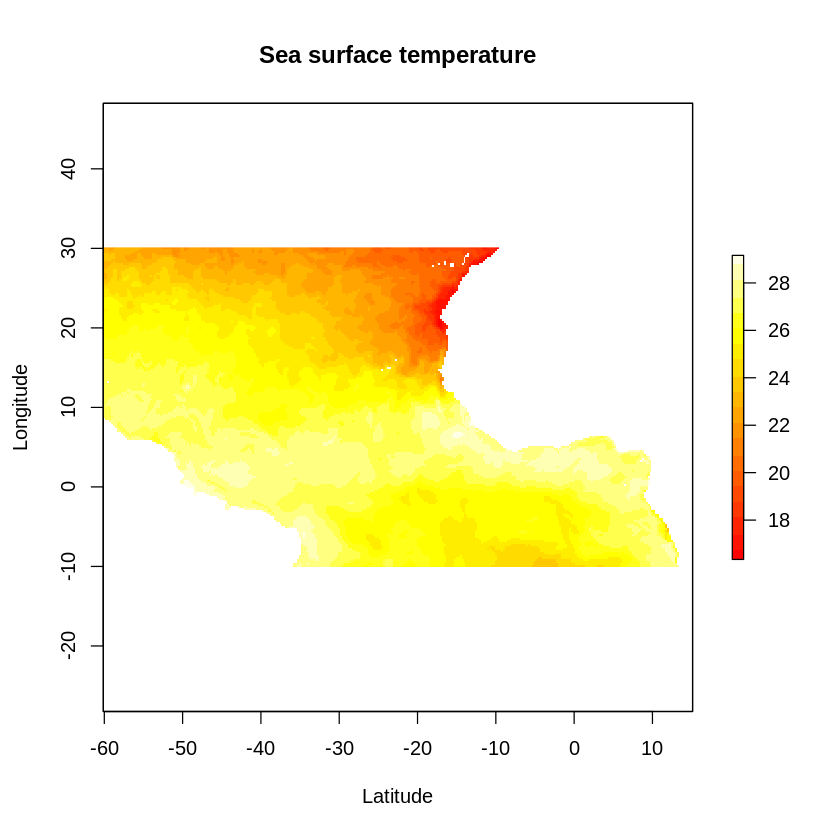

In [109]:
# available palettes hcl.pals()
# select palette hcl.colors(12, "Dark Mint")

myCol = heat.colors(20)


# Add axis labels
plot(out, 
     col=myCol,
     main="Sea surface temperature", 
     xlab = "Latitude", 
     ylab = "Longitude")
